# Modelo de Clasificación - Multi-clases
**260524**

In [3]:
#!pip install matplotlib

In [4]:
# Importar las bibliotecas necesarias
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

In [6]:
# Paso 1: Crear un conjunto de datos de clasificación multiclase
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_classes=3, random_state=42)

In [13]:
x_pd = pd.DataFrame(X)
#x_pd
y_pd = pd.DataFrame(y)
#y_pd[0].unique()


In [14]:
# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Paso 3: Definir el pipeline
#  - StandardScaler: Normalizar los datos
#  - LogisticRegression: Clasificador base
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar las características
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

In [18]:
# Paso 4: Configurar la validación cruzada con GridSearchCV para optimización de hiperparámetros
param_grid = {'clf__estimator__C': [0.01, 0.1, 1, 10, 100]}  # Optimizar el parámetro C de la regresión logística

# Implementar GridSearchCV con validación cruzada 5-fold
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'clf__estimator__C': 10}


In [19]:
# Paso 5: Entrenar el mejor modelo encontrado en todo el conjunto de entrenamiento
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(C=10,
                                                                  solver='liblinear')))])

In [20]:
# Paso 6: Hacer predicciones con los datos de prueba
y_pred = best_model.predict(X_test)

In [22]:
pd.DataFrame(y_pred)

,0
0,1
1,0
2,1
3,2
4,1
...,...
295,1
296,0
297,0
298,0


Accuracy: 0.61


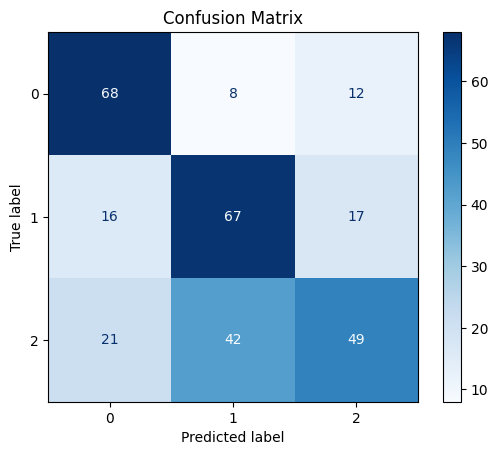


Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.77      0.70        88
           1       0.57      0.67      0.62       100
           2       0.63      0.44      0.52       112

    accuracy                           0.61       300
   macro avg       0.62      0.63      0.61       300
weighted avg       0.62      0.61      0.61       300



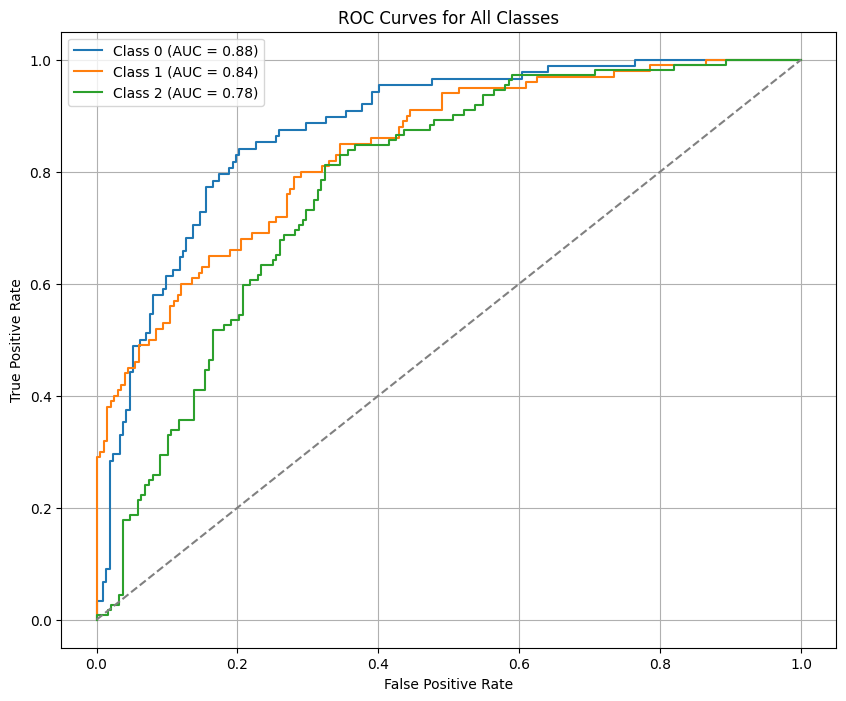

AUC-ROC for class 0: 0.88
AUC-ROC for class 1: 0.84
AUC-ROC for class 2: 0.78


In [25]:
# Paso 7: Evaluar el rendimiento

# 1. Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Explicación de la matriz de confusión:
# TP (True Positives), FP (False Positives), FN (False Negatives), TN (True Negatives)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 3. AUC-ROC Score para cada clase
# Nota: OneVsRestClassifier genera un modelo binario para cada clase.
# Para el AUC-ROC, utilizamos las probabilidades de predicción para calcular el ROC AUC para cada clase.
y_prob = best_model.predict_proba(X_test)  # Obtener las probabilidades de predicción

# Calcular el AUC para cada clase y graficar el ROC curve
plt.figure(figsize=(10, 8))
for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    auc = roc_auc_score(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")

# Dibujar la línea diagonal que representa un clasificador aleatorio
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Classes")
plt.legend()
plt.grid(True)
plt.show()

# Opcional: AUC-ROC Score impreso para cada clase
for i in range(y_prob.shape[1]):
    auc = roc_auc_score(y_test == i, y_prob[:, i])
    print(f"AUC-ROC for class {i}: {auc:.2f}")

